In [35]:
#The below is a cooptimization of both the batch size and the learning rate. This type of anaylsis became necessary because smaller batch sizes require smaller learning rates to be effective, visa verca for large batch sizes.
#The below results in the 4th notebook cell show that a batch size of 24 and a learning rate of 0.00455 is the best combination for average validation accuracy with low variation.
#This combination should improve accuracy over the previous default batch size and LR or 6 and 0.001, while also being faster to train.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np
import seaborn as sns

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [30]:
df["optimizer.learning_rate"] = df["optimizer.learning_rate"].astype('float64')
df['optimizer.learning_rate'] = df['optimizer.learning_rate'].round(5)
df["batch_size"] = df["batch_size"].astype('uint8')

desc = df[df.epoch > 6].groupby(['batch_size','optimizer.learning_rate']).describe()
val_acc = desc['Validation Accuracy'].reset_index().sort_values('50%', ascending=False)
train_acc = desc['Train Accuracy'].reset_index().sort_values('50%', ascending=False)

In [32]:
val_acc[val_acc['50%'] > 0.7]

,batch_size,optimizer.learning_rate,count,mean,std,min,25%,50%,75%,max
33,24,0.00305,20.0,0.671997,0.098131,0.532200,0.574439,0.729740,0.739689,0.776411
21,12,0.00305,20.0,0.700543,0.093958,0.534009,0.678003,0.725036,0.753889,0.815123
35,24,0.00405,20.0,0.714273,0.043207,0.592258,0.703057,0.722142,0.736795,0.767366
28,18,0.00355,20.0,0.685166,0.101881,0.502171,0.590901,0.718524,0.769446,0.797757
36,24,0.00455,20.0,0.727406,0.044776,0.658104,0.691480,0.715991,0.759045,0.793054
20,12,0.00255,20.0,0.696292,0.097285,0.534009,0.656657,0.715268,0.786451,0.795586
19,12,0.00205,20.0,0.689020,0.063576,0.589363,0.624457,0.707308,0.737247,0.781838


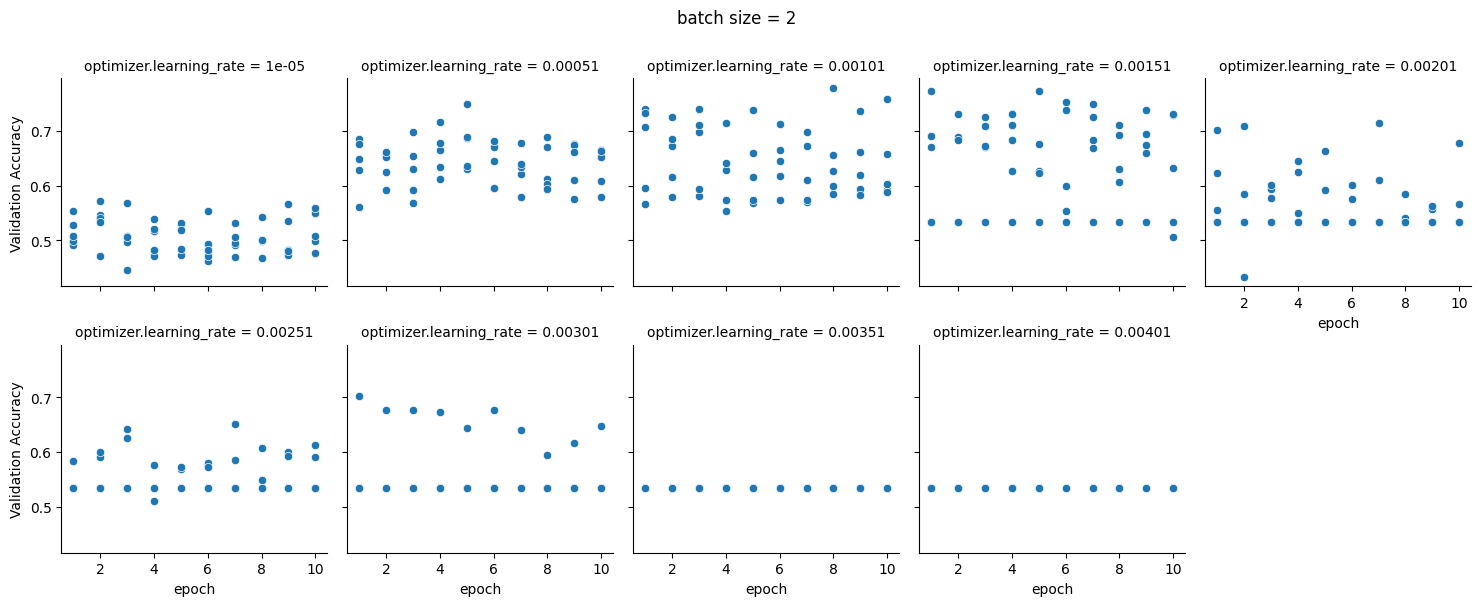

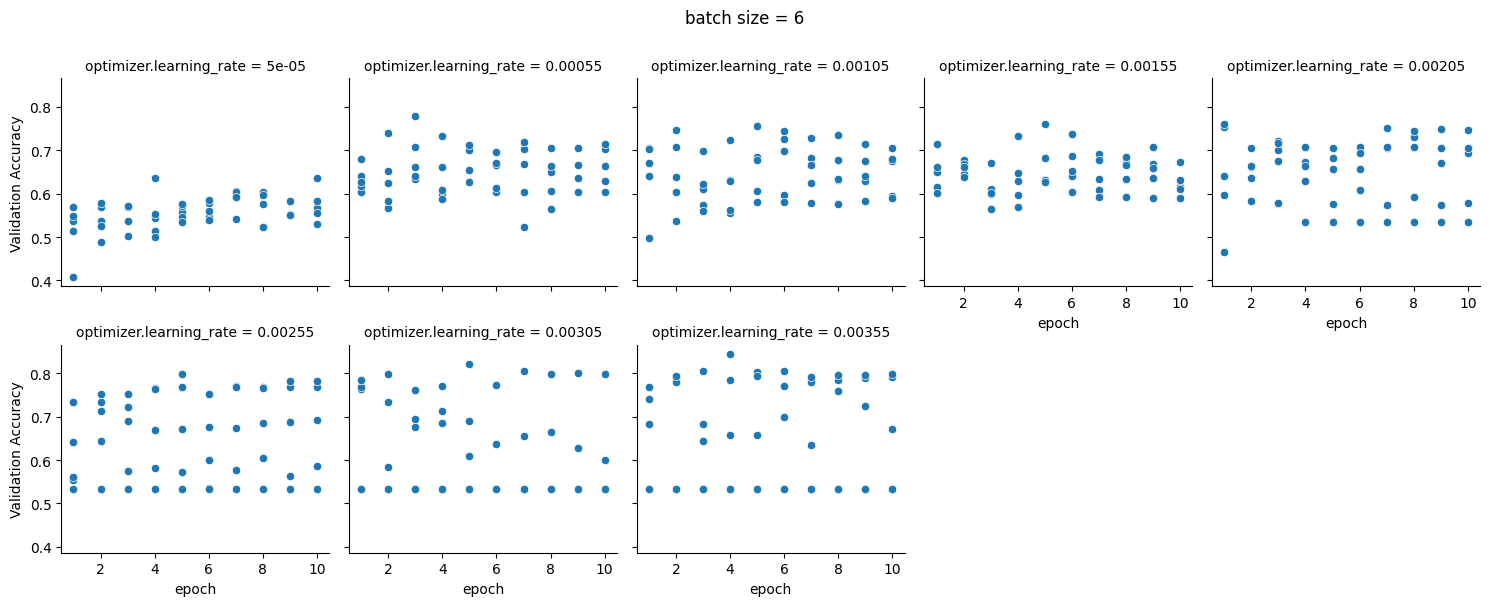

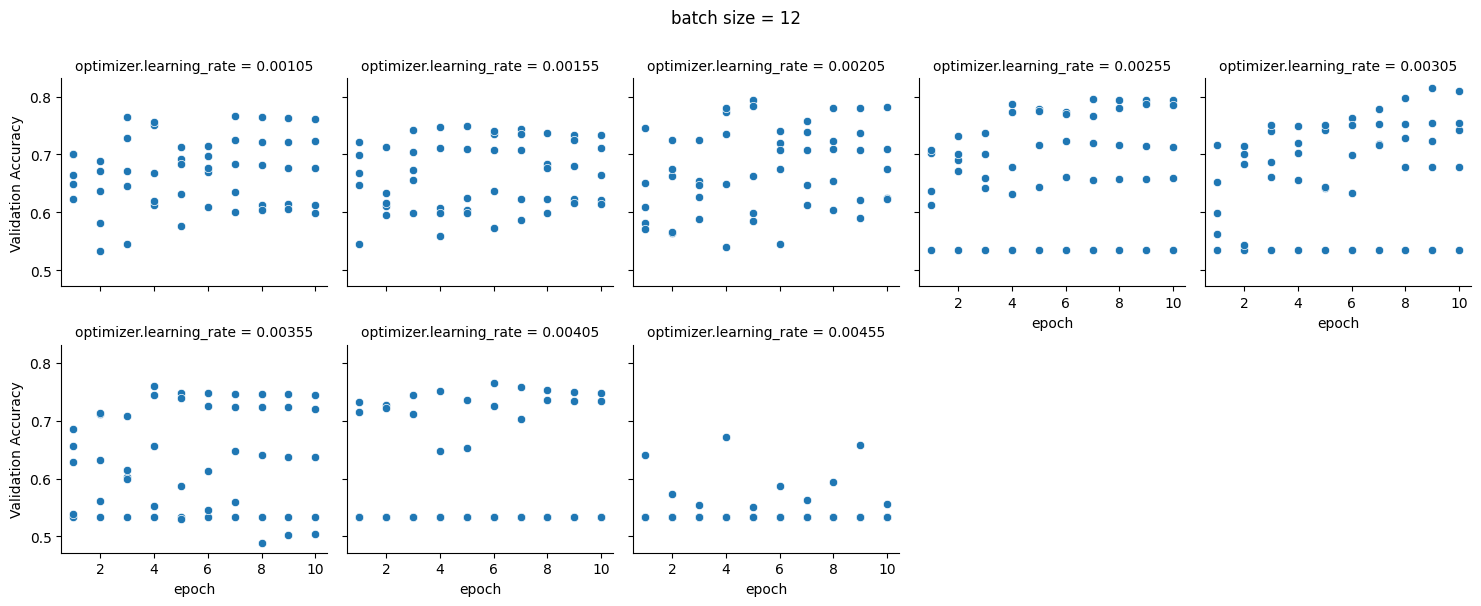

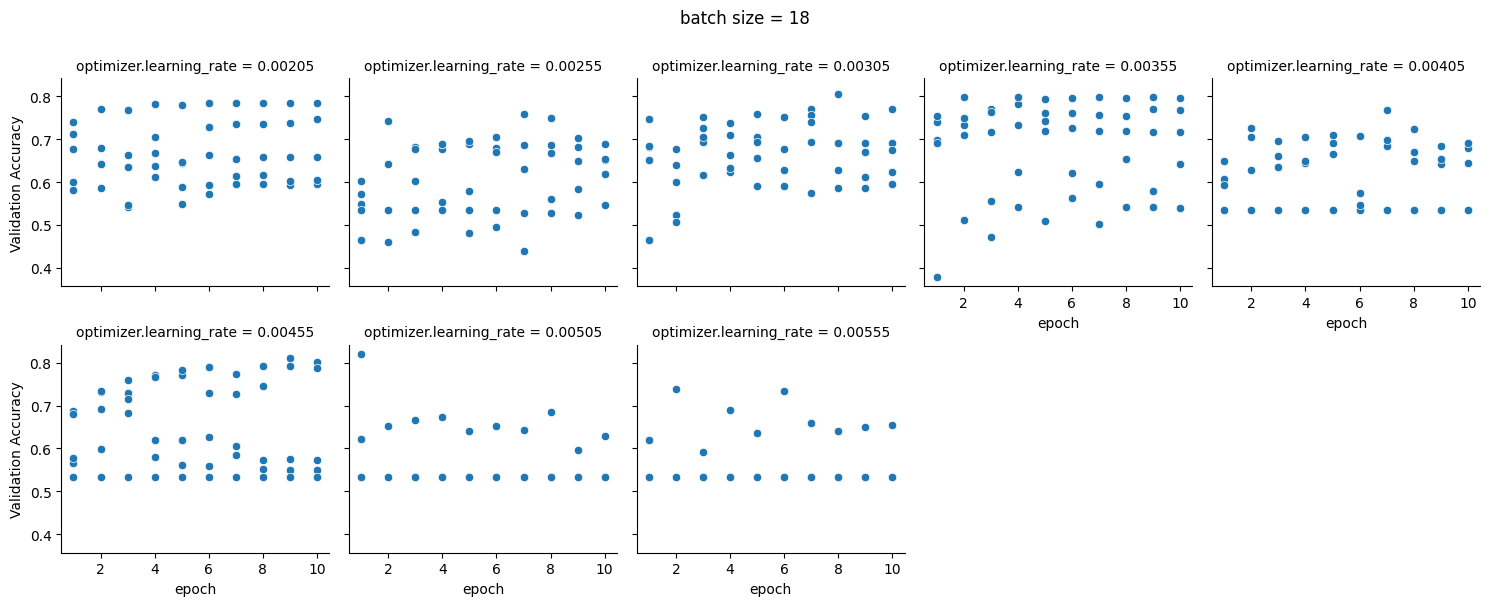

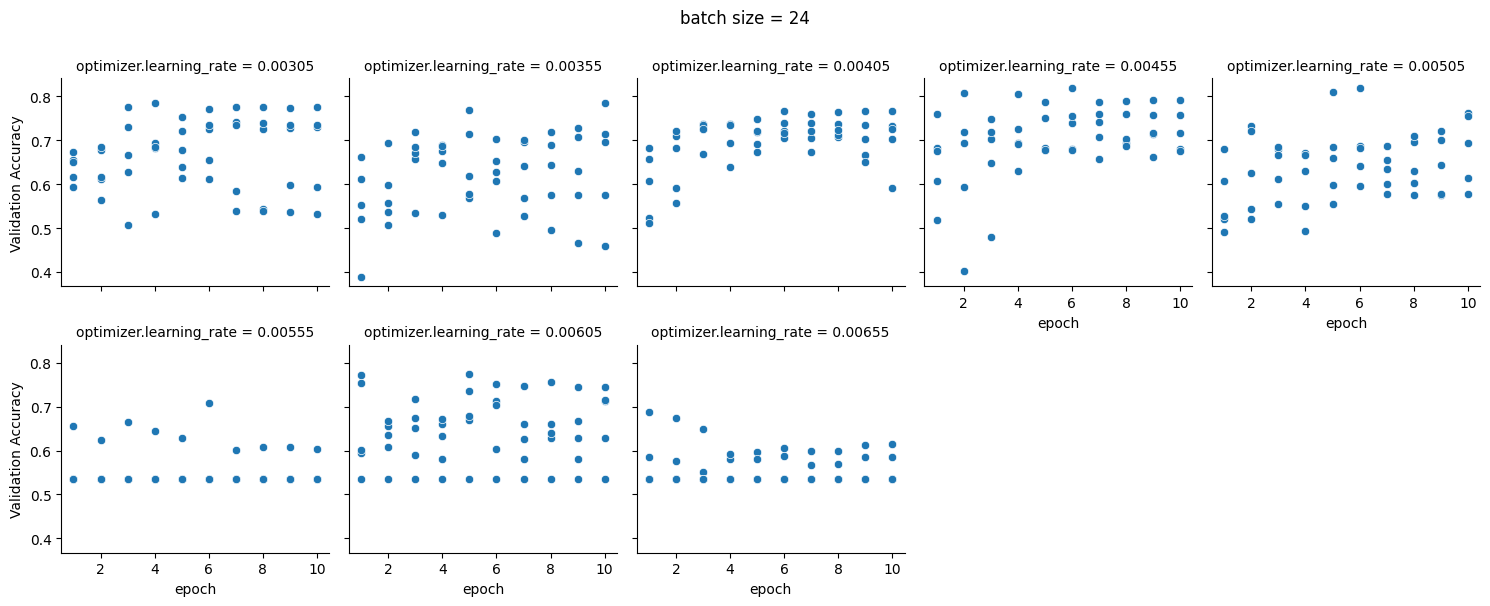

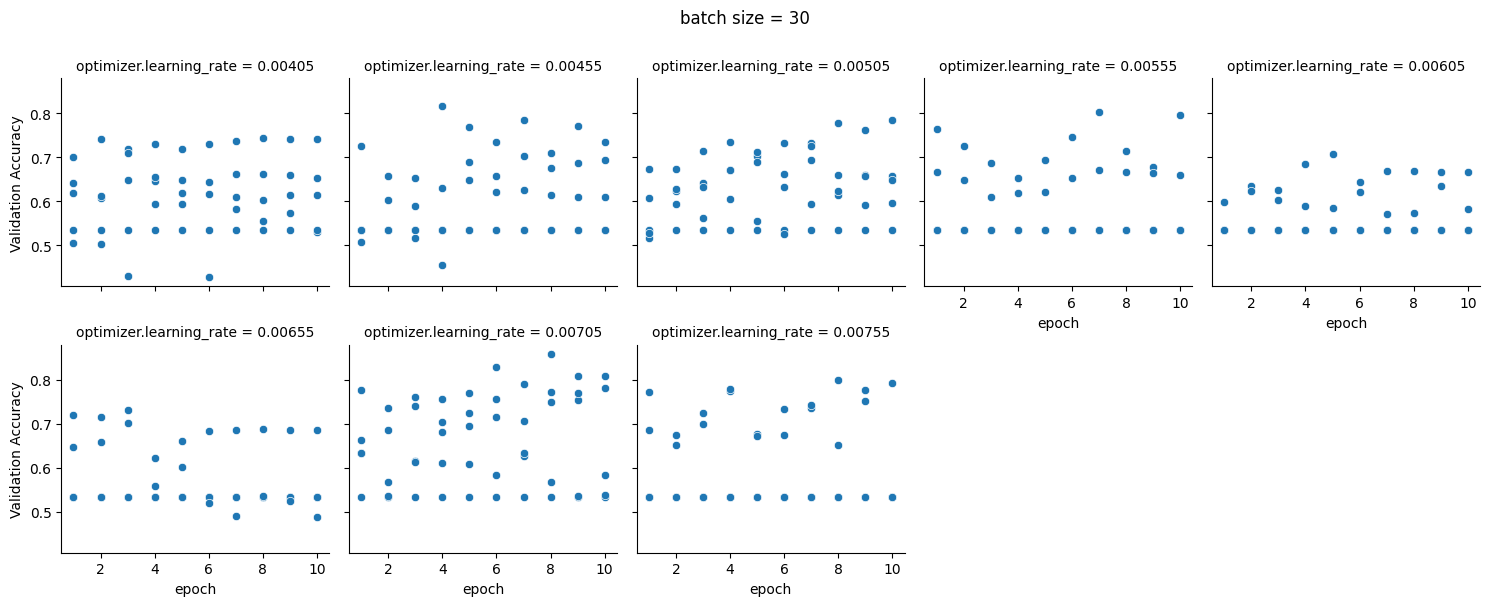

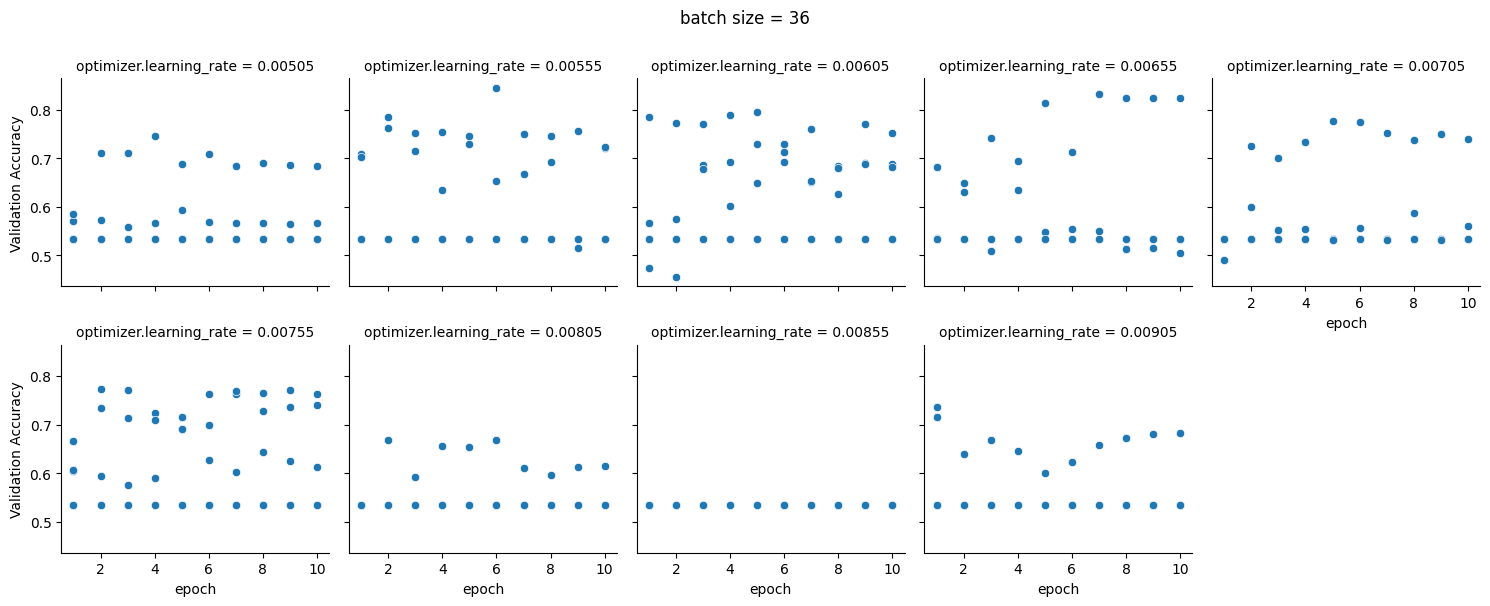

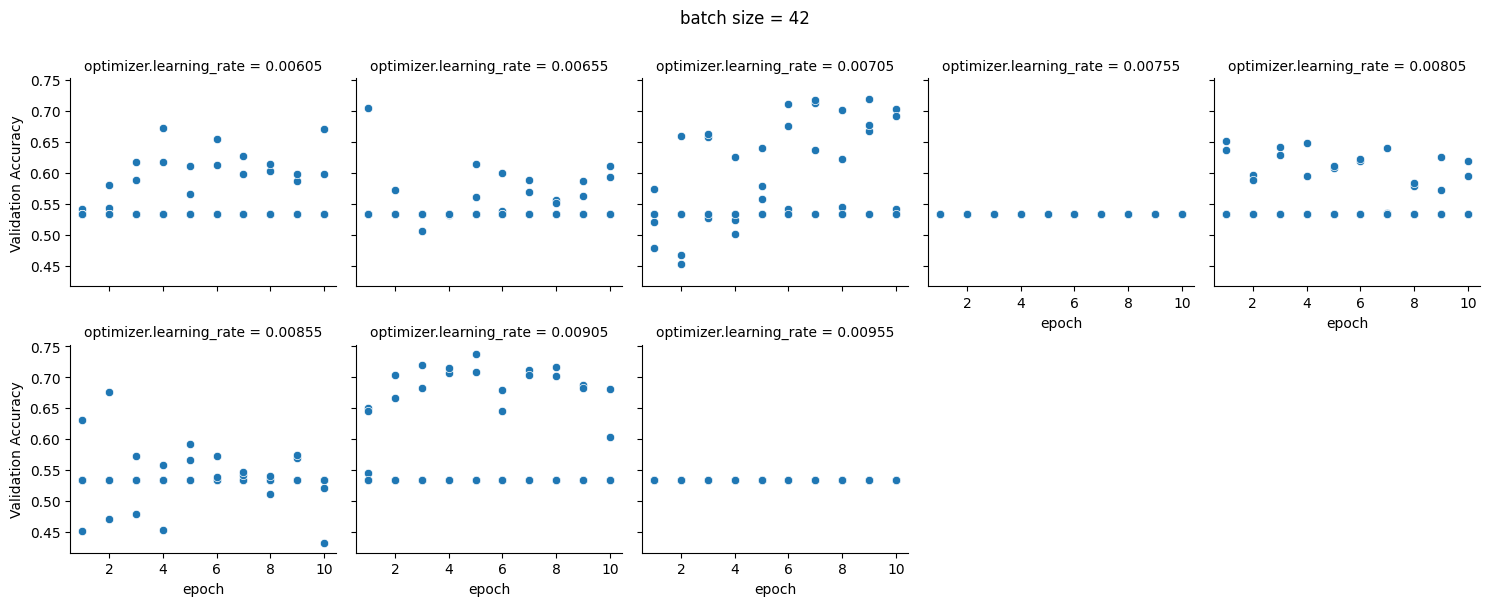

In [33]:

for bs in df.batch_size.unique():
    
    temp_df = df[df.batch_size==bs]
    
    g = sns.FacetGrid(temp_df, col='optimizer.learning_rate', col_wrap=5)
    g.map_dataframe(sns.scatterplot, x='epoch', y='Validation Accuracy')
    #g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy', palette = 'husl')
    plt.suptitle(f'batch size = {bs}', va = 'baseline')
    plt.tight_layout()

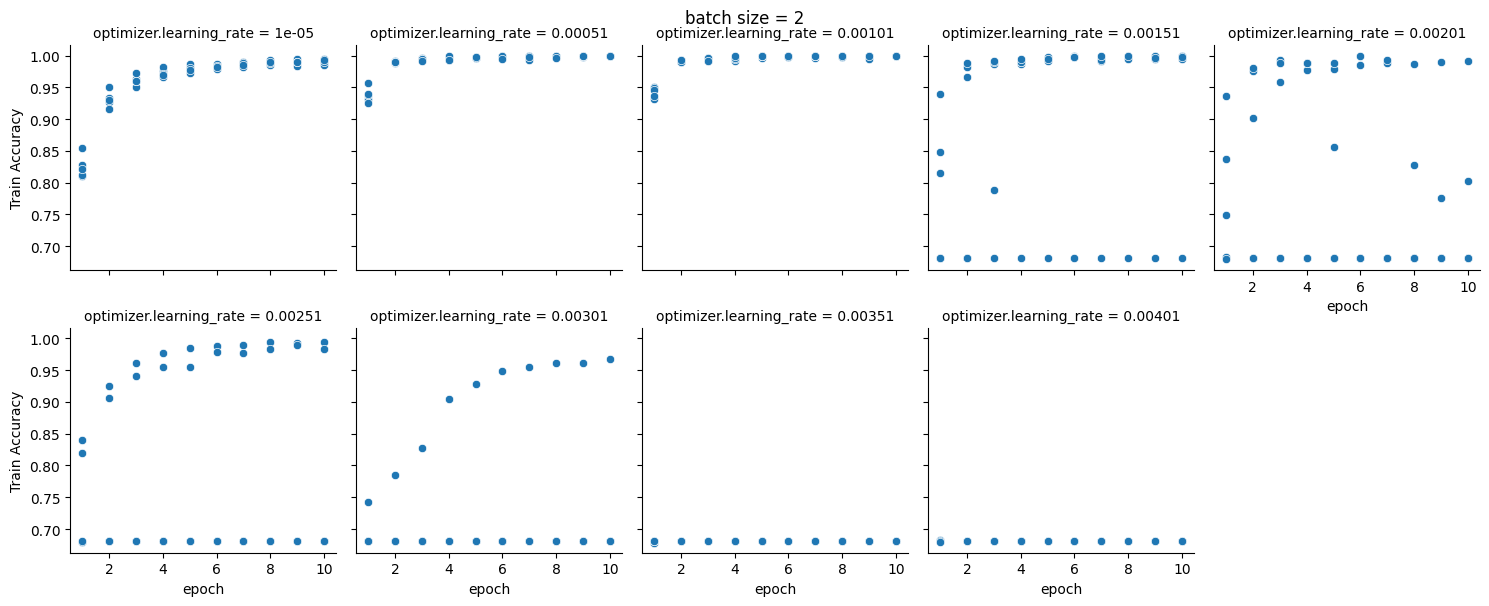

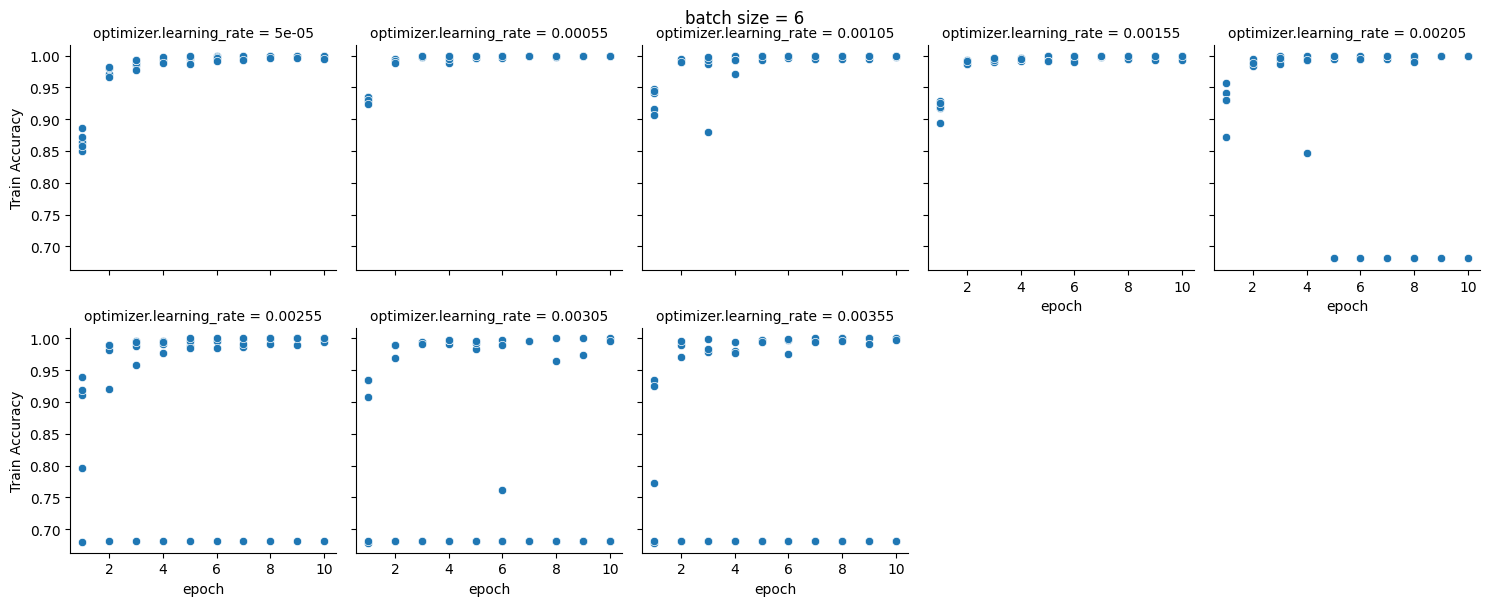

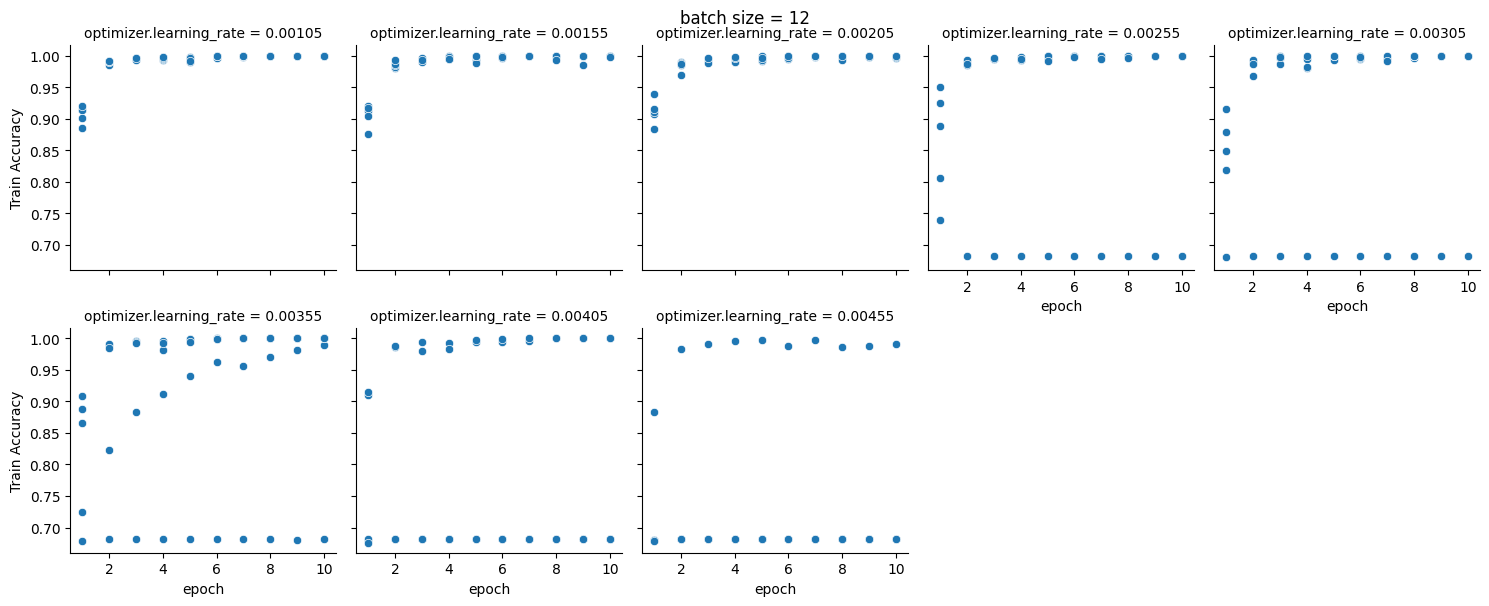

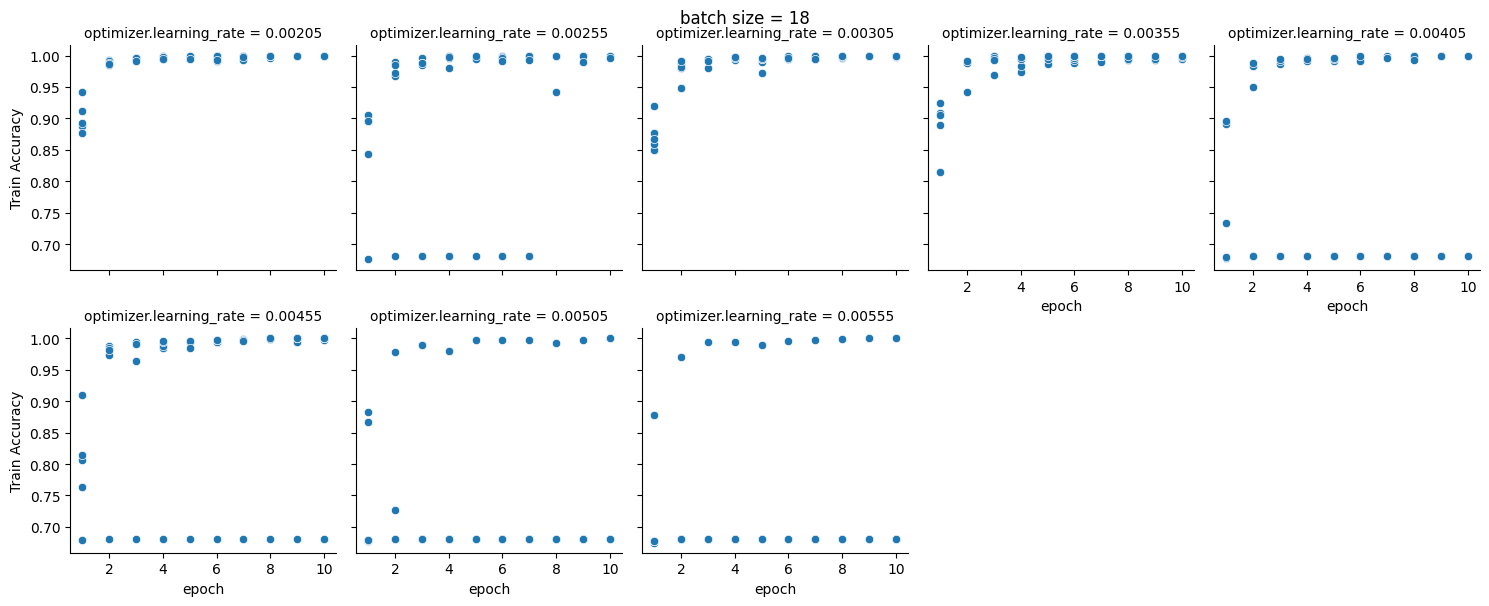

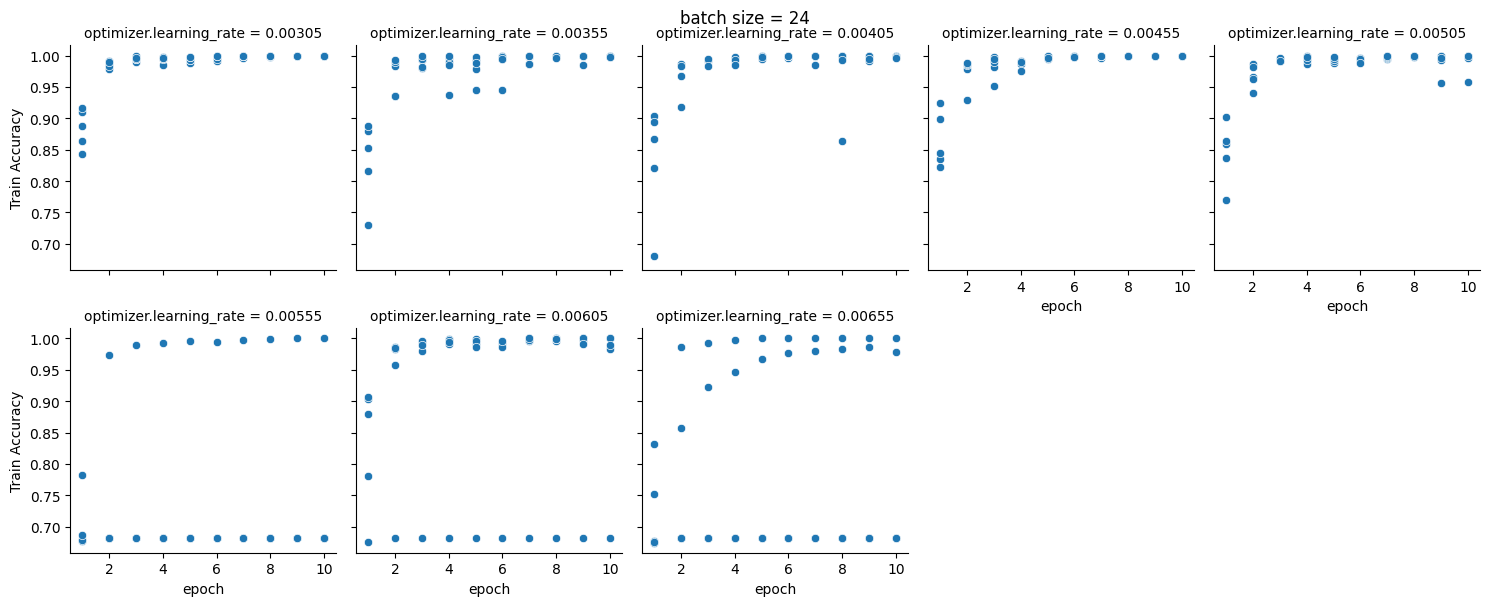

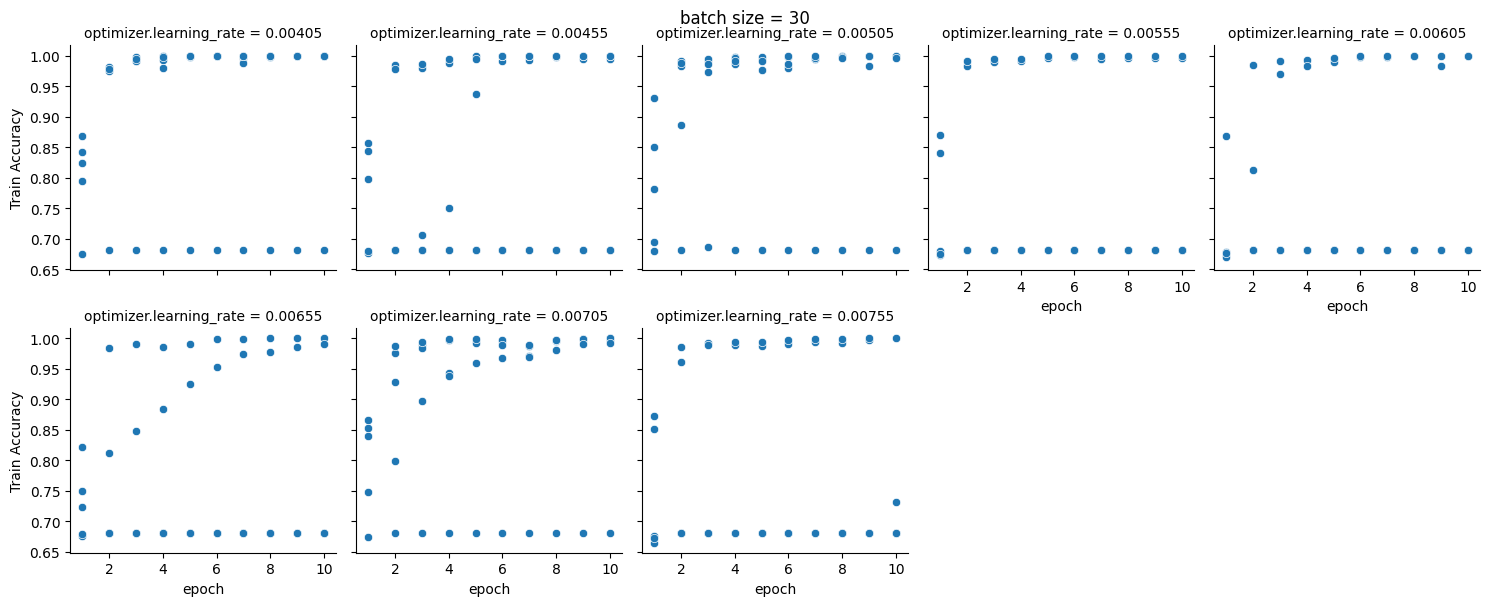

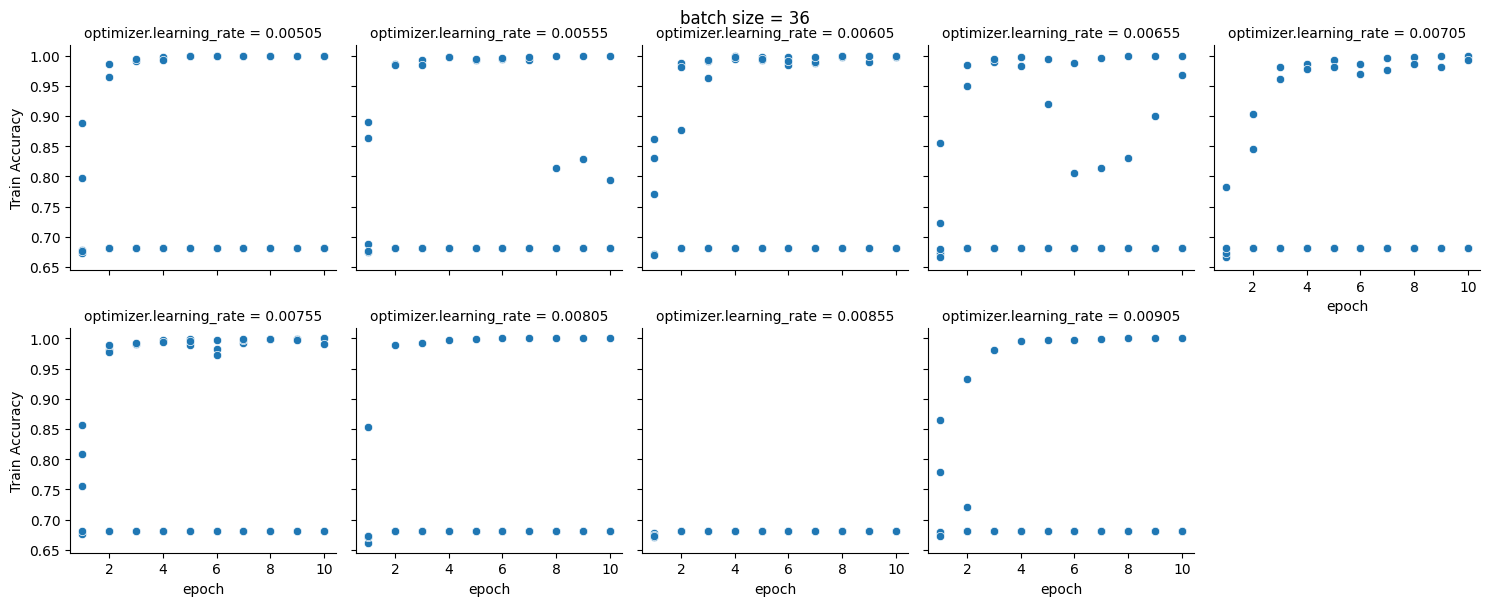

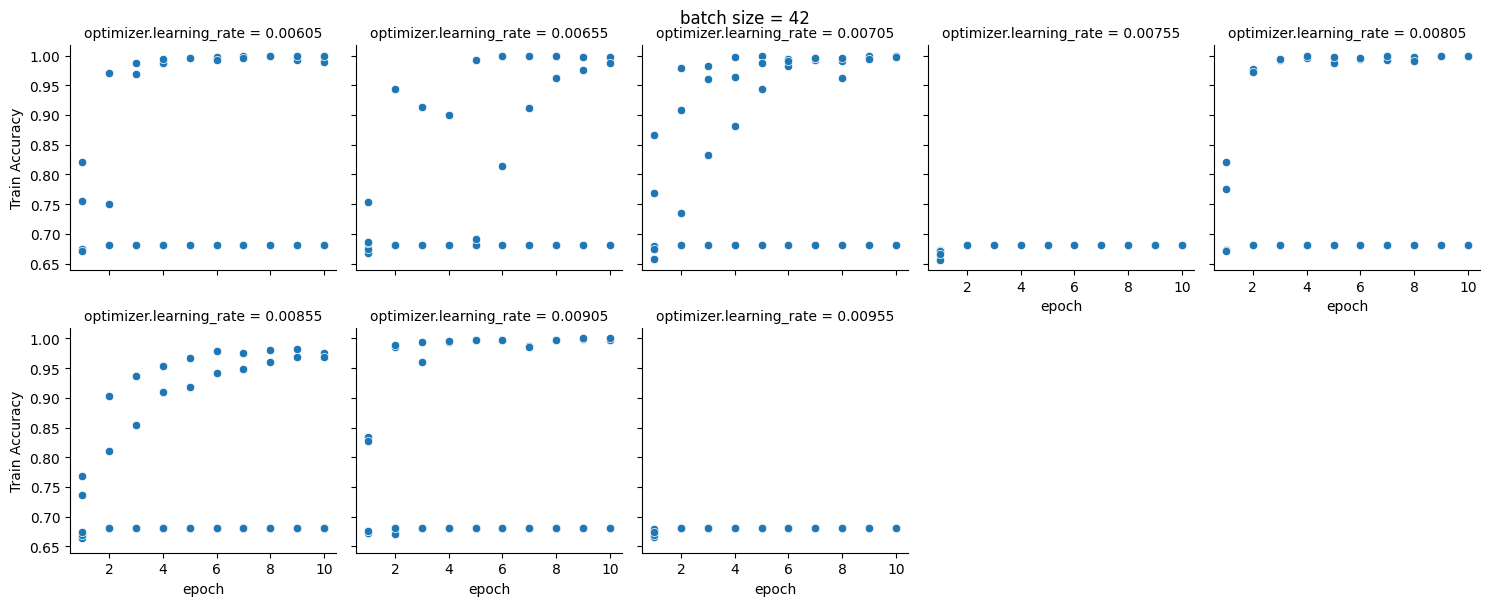

In [34]:

for bs in df.batch_size.unique():
    
    temp_df = df[df.batch_size==bs]
    
    g = sns.FacetGrid(temp_df, col='optimizer.learning_rate', col_wrap=5)
    g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy')
    #g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy', palette = 'husl')
    plt.suptitle(f'batch size = {bs}', va = 'baseline')